# Technical Walkthrough

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import pandas_profiling as pp

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import pickle

# Main DataFrames

In [3]:
# previous years csv
previous_years = pd.read_csv('previous_years_FINAL.csv').drop(columns='Unnamed: 0')
previous_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
0,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.279915,0.322068,0.446581,0.768649,1954,1954,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
1,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.313953,0.366261,0.539867,0.906129,1954,1955,1,0.286325,0.810345,0.442748,0.370370,0.500000,1.076923,0.536232,0.500000,-0.50,0.750000,0.564103,0.000000,0.000000,0.166667,0.000000,0.538462,0.121605,0.137219,0.208889,0.178859,4
2,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.328407,0.364885,0.558292,0.923178,1954,1956,2,0.011628,0.009524,0.058201,-0.081081,0.555556,-0.037037,-0.132075,-0.333333,3.00,-0.244898,-0.114754,0.200000,-0.333333,-0.285714,0.750000,0.050000,0.046038,-0.003757,0.034129,0.018816,4
3,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.321951,0.377778,0.600000,0.977778,1954,1957,3,0.009852,0.113208,-0.010000,-0.205882,-0.571429,0.692308,0.434783,-0.500000,-0.75,0.540541,0.074074,1.500000,-1.000000,-1.000000,-0.571429,-0.380952,-0.019659,0.035332,0.074706,0.059144,4
4,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.326123,0.385542,0.545757,0.931299,1954,1958,4,-0.022764,-0.076271,-0.010101,0.259259,-0.333333,-0.318182,-0.280303,3.000000,0.00,0.035088,-0.155172,0.066667,0.000000,0.000000,0.000000,0.615385,0.012958,0.020553,-0.090405,-0.047535,4


In [4]:
previous_years.tail()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
38903,zuninmi01,2014,SEA,1,131,438,51,87,20,2,22,60.0,0.0,3.0,17,158.0,1.0,17.0,0.0,4.0,12.0,Mike,Zunino,R,R,2013-06-12,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.198630,0.254202,0.404110,0.658311,2013,2014,1,1.531792,1.318182,1.351351,3.000000,0.0,3.400000,3.285714,-1.0,0.000000,0.062500,2.224490,0.0,4.666667,0.0,3.0,1.400,-0.071270,-0.123912,0.226508,0.062417,3
38904,zuninmi01,2015,SEA,1,112,350,28,61,11,0,11,28.0,0.0,1.0,21,132.0,0.0,5.0,8.0,2.0,6.0,Mike,Zunino,R,R,2013-06-12,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.174286,0.230159,0.300000,0.530159,2013,2015,2,-0.200913,-0.450980,-0.298851,-0.450000,-1.0,-0.500000,-0.533333,0.0,-0.666667,0.235294,-0.164557,-1.0,-0.705882,0.0,-0.5,-0.500,-0.122562,-0.094582,-0.257627,-0.194669,3
38905,zuninmi01,2016,SEA,1,55,164,16,34,7,0,12,31.0,0.0,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0,Mike,Zunino,R,R,2013-06-12,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.207317,0.317708,0.469512,0.787221,2013,2016,3,-0.531429,-0.428571,-0.442623,-0.363636,0.0,0.090909,0.107143,0.0,-1.000000,0.000000,-0.507576,0.0,0.200000,-1.0,-0.5,-1.000,0.189524,0.380388,0.565041,0.484877,3
38906,zuninmi01,2017,SEA,1,124,387,52,97,25,0,25,64.0,1.0,0.0,39,160.0,0.0,8.0,0.0,1.0,8.0,Mike,Zunino,R,R,2013-06-12,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.250646,0.331034,0.509044,0.840078,2013,2017,4,1.359756,2.250000,1.852941,2.571429,0.0,1.083333,1.064516,0.0,0.000000,0.857143,1.461538,0.0,0.333333,0.0,0.0,0.000,0.208998,0.041945,0.084197,0.067145,3
38907,zuninmi01,2018,SEA,1,113,373,37,75,18,0,20,44.0,0.0,0.0,24,150.0,0.0,6.0,0.0,2.0,7.0,Mike,Zunino,R,R,2013-06-12,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.201072,0.259259,0.410188,0.669447,2013,2018,5,-0.036176,-0.288462,-0.226804,-0.280000,0.0,-0.200000,-0.312500,-1.0,0.000000,-0.384615,-0.062500,0.0,-0.250000,0.0,1.0,-0.125,-0.197783,-0.216821,-0.194200,-0.203114,3


In [5]:
# last year csv
last_year_df = pd.read_csv('last_year_df_FINAL.csv').drop(columns='Unnamed: 0')
last_year_df.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
0,aaronha01,1976,ML4,1,85,271,22,62,8,0,10,35.0,0.0,1.0,35,38.0,1.0,0.0,0.0,2.0,8.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.228782,0.314935,0.369004,0.683939,1954,1976,22,-0.417204,-0.511111,-0.431193,-0.500,-1.0,-0.166667,-0.416667,0.000000,0.0,-0.500000,-0.254902,-0.666667,-1.0,-1.0,-0.666667,-0.466667,-0.024002,-0.051696,0.039919,-0.004372,6
1,aaronto01,1971,ATL,1,25,53,4,12,2,0,0,3.0,0.0,0.0,3,5.0,1.0,0.0,0.0,0.0,3.0,Tommie,Aaron,R,R,1962-04-10,1971,0.0,0.0,0.0,0.328671,0.671329,0.0,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0.226415,0.267857,0.264151,0.532008,1962,1971,9,-0.158730,0.333333,-0.076923,0.000,0.0,-1.000000,-0.571429,0.000000,0.0,0.000000,-0.500000,0.000000,0.0,0.0,0.000000,-0.400000,0.097242,0.104911,-0.207547,-0.075986,6
2,abbated01,1910,BSN,2,52,178,20,44,4,2,0,10.0,2.0,0.0,12,16.0,0.0,0.0,8.0,0.0,0.0,Ed,Abbaticchio,R,R,1897-09-04,1910,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.247191,0.294737,0.292135,0.586872,1897,1910,13,1.045977,0.538462,1.200000,0.000,0.0,-1.000000,-0.375000,0.000000,0.0,-0.368421,0.454545,0.000000,0.0,7.0,0.000000,0.000000,0.075281,-0.198920,0.105032,-0.071835,2
3,abnersh01,1992,CHA,1,97,208,21,58,10,1,1,16.0,1.0,2.0,12,35.0,2.0,3.0,2.0,3.0,3.0,Shawn,Abner,R,R,1987-09-08,1992,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.278846,0.323009,0.350962,0.673970,1987,1992,5,0.808696,0.400000,2.052632,1.500,0.0,0.000000,2.200000,0.000000,0.0,0.714286,0.400000,-0.500000,2.0,1.0,2.000000,0.000000,0.687753,0.483448,0.441449,0.461277,0
4,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,2014,0.0,0.0,0.0,0.000000,0.000000,0.0,0.805995,0.194005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.317949,-0.571429,-0.312500,0.125,-1.0,-0.666667,-0.263158,-0.833333,-1.0,-0.428571,-0.588235,-1.000000,0.0,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321,3


In [6]:
last_year_df.tail()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
2832,zimmedo01,1965,WS2,1,95,226,20,45,6,0,2,17.0,2.0,0.0,26,59.0,1.0,2.0,1.0,3.0,7.0,Don,Zimmer,R,R,1954-07-02,1965,0.0,0.0,0.0,0.698308,0.301692,0.000000,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.199115,0.284047,0.252212,0.536259,1954,1965,11,-0.337243,-0.473684,-0.464286,-0.625000,-1.0,-0.833333,-0.552632,1.000000,-1.0,-0.037037,-0.372340,0.00,0.000000,-0.500000,0.0,-0.125000,-0.191688,-0.058296,-0.385683,-0.247026,6
2833,zimmehe01,1919,NY1,1,123,444,56,113,20,6,4,58.0,8.0,0.0,21,30.0,0.0,5.0,20.0,0.0,0.0,Heinie,Zimmerman,R,R,1907-09-08,1919,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.254505,0.295745,0.353604,0.649348,1907,1919,12,-0.041037,0.302326,-0.103175,0.052632,-0.4,3.000000,0.035714,-0.428571,0.0,0.615385,0.304348,0.00,4.000000,0.818182,0.0,0.000000,-0.064797,0.007644,-0.025485,-0.010671,2
2834,zimmeje01,1968,MIN,1,24,45,3,5,1,0,0,2.0,0.0,0.0,3,10.0,0.0,1.0,0.0,1.0,0.0,Jerry,Zimmerman,R,R,1961-04-14,1968,0.0,0.0,0.0,0.227743,0.772257,0.000000,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.111111,0.180000,0.133333,0.313333,1961,1968,7,-0.807692,-0.769231,-0.871795,-0.666667,0.0,-1.000000,-0.833333,0.000000,-1.0,-0.863636,-0.795918,-1.00,-0.500000,-1.000000,0.0,-1.000000,-0.333333,-0.260000,-0.306667,-0.280605,6
2835,ziskri01,1983,SEA,1,90,285,30,69,12,0,12,36.0,0.0,0.0,30,61.0,3.0,0.0,0.0,3.0,6.0,Richie,Zisk,R,R,1971-09-08,1983,0.0,0.0,0.0,0.000000,0.387684,0.612316,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0.242105,0.311321,0.410526,0.721847,1971,1983,12,-0.433400,-0.508197,-0.530612,-0.571429,-1.0,-0.428571,-0.419355,-1.000000,-1.0,-0.387755,-0.314607,-0.25,-1.000000,0.000000,0.0,-0.333333,-0.171572,-0.121349,-0.139605,-0.131825,0
2836,zitzmbi01,1929,CIN,1,47,84,18,19,3,0,0,6.0,4.0,0.0,9,10.0,0.0,1.0,2.0,0.0,0.0,Billy,Zitzmann,R,R,1919-04-27,1929,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.226190,0.308511,0.261905,0.570415,1919,1929,10,-0.684211,-0.660377,-0.759494,-0.666667,-1.0,-1.000000,-0.818182,-0.692308,0.0,-0.307692,-0.545455,0.00,-0.666667,-0.857143,0.0,0.000000,-0.238397,-0.084211,-0.323625,-0.212239,5


Load Models

In [7]:
lr_AVE_model = pickle.load(open("./models/lr_AVE.pkl","rb"))

In [8]:
ridge_AVE_model = pickle.load(open("./models/ridge_AVE.pkl","rb"))

In [9]:
lasso_AVE_model = pickle.load(open("./models/lasso_AVE.pkl","rb"))

In [10]:
enet_AVE_model = pickle.load(open("./models/enet_AVE.pkl","rb"))

In [11]:
rf_AVE_model = pickle.load(open("./models/rf_AVE.pkl","rb"))

# Models to Predict AVE

In [12]:
# AVE is the target, removed H, G, AB
attributes = ['2B','3B','OPS','RBI','SB','CS','BB','SO',
              'IBB','HBP','SH','SF','GIDP','pre1920_percent',
              '1920-41_percent','1942-45_percent','1946-62_percent',
              '1963-76_percent','1977-92_percent','1993-2009_percent',
              'post2009_percent','era_1','era_2','era_3','era_4','era_5',
              'era_6','era_7','era_8','decade_1910','decade_1920',
              'decade_1930','decade_1940','decade_1950','decade_1960',
              'decade_1970','decade_1980','decade_1990','decade_2000',
              'decade_2010','throws_R','bats_R','OBP','Slug_Percent',
              'HR','YRSPRO','2B_chg','3B_chg','OPS_chg','RBI_chg','SB_chg',
              'CS_chg','BB_chg','SO_chg','IBB_chg','HBP_chg','SH_chg',
              'SF_chg','GIDP_chg','OBP_chg','Slug_chg','HR_chg','KMeans_label']

New data to test the model against

In [13]:
# unseen data
X_final = last_year_df[attributes]

Set X and y variables

In [14]:
# set X and y
X = previous_years[attributes]
y = previous_years['AVE']

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_final_poly = poly.fit_transform(X_final)

In [17]:
ss = StandardScaler()
X_train_poly_sc = ss.fit_transform(X_train_poly)
X_test_poly_sc = ss.fit_transform(X_test_poly)
X_final_poly_sc = ss.fit_transform(X_final_poly)

Linear Regression Model to Predict AVE

In [18]:
# R2 scores for train data
lr_train = lr_AVE_model.score(X_train, y_train)
print(lr_train)

# R2 scores for test data
lr_test = lr_AVE_model.score(X_test, y_test)
print(lr_test)

# R2 scores for new data
lr_test_new = lr_AVE_model.score(X_final, last_year_df['AVE'])
print(lr_test_new)

# make predictions
lrpreds = lr_AVE_model.predict(X_final)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['AVE'], lrpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
lr_score = rmse

0.927265749628238
0.9245850874144554
0.8157356416523764
RMSE: 0.022072780140648625


Ridge Model to Predict AVE

In [19]:
# R2 scores for train data
ridge_train = ridge_AVE_model.score(X_train_poly_sc, y_train)
print(ridge_train)

# R2 scores for test data
ridge_test = ridge_AVE_model.score(X_test_poly_sc, y_test)
print(ridge_test)

# R2 scores for new data
ridge_test_new = ridge_AVE_model.score(X_final_poly_sc, last_year_df['AVE'])
print(ridge_test_new)

# make predictions
ridgepreds = ridge_AVE_model.predict(X_final_poly_sc)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['AVE'], ridgepreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
ridge_score = rmse

0.9641036826810402
0.9501996596045186
0.6033050721934583
RMSE: 0.0323865503500996


Lasso Model to Predict AVE

In [20]:
# R2 scores for train data
lasso_train = lasso_AVE_model.score(X_train_poly_sc, y_train)
print(lasso_train)

# R2 scores for test data
lasso_test = lasso_AVE_model.score(X_test_poly_sc, y_test)
print(lasso_test)

# R2 scores for new data
lasso_test_new = lasso_AVE_model.score(X_final_poly_sc, last_year_df['AVE'])
print(lasso_test_new)

# make predictions
lassopreds = lasso_AVE_model.predict(X_final_poly_sc)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['AVE'], lassopreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
lasso_score = rmse

0.9167955525718006
0.9140641297211587
0.5885954929121789
RMSE: 0.03298153698364595


ElasticNet Model to Predict AVE

In [21]:
# R2 scores for train data
enet_train = enet_AVE_model.score(X_train_poly_sc, y_train)
print(enet_train)

# R2 scores for test data
enet_test = enet_AVE_model.score(X_test_poly_sc, y_test)
print(enet_test)

# R2 scores for new data
enet_test_new = enet_AVE_model.score(X_final_poly_sc, last_year_df['AVE'])
print(enet_test_new)

# make predictions
enetpreds = enet_AVE_model.predict(X_final_poly_sc)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['AVE'], enetpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
enet_score = rmse


0.9471689658637862
0.9453456477932288
0.6370941785539136
RMSE: 0.030976570580385922


Random Forest Model to Predict AVE

In [22]:
# R2 scores for train data
rf_train = rf_AVE_model.score(X_train_poly, y_train)
print(rf_train)

# R2 scores for test data
rf_test = rf_AVE_model.score(X_test_poly, y_test)
print(rf_test)

# R2 scores for new data
rf_test_new = rf_AVE_model.score(X_final_poly, last_year_df['AVE'])
print(rf_test_new)

# make predictions
rfpreds = rf_AVE_model.predict(X_final_poly)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['AVE'], rfpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
rf_score = rmse


0.9935941144091776
0.9543081856108968
0.893922137971072
RMSE: 0.016747452199047858


In [23]:
# function to display RMSE and Train, Test and new data R2 scores

def rmse_scores(lr_score, ridge_score, lasso_score, enet_score,
               lr_train, lr_test, ridge_train, ridge_test, 
                lasso_train, lasso_test, enet_train, enet_test, 
                rf_score, rf_train, rf_test, lr_test_new, ridge_test_new, 
                lasso_test_new, enet_test_new, rf_test_new):
    
    print(f'Linear Regression Train R2 Score: {lr_train}')
    print(f'Linear Regression Test R2 Score: {lr_test}')
    print(f'Ridge Train R2 Score: {ridge_train}')
    print(f'Ridge Test R2 Score: {ridge_test}')
    print(f'Lasso Train R2 Score: {lasso_train}')
    print(f'Lasso Test R2 Score: {lasso_test}')
    print(f'ElasticNet Train R2 Score: {enet_train}')
    print(f'ElasticNet Test R2 Score: {enet_test}')
    print(f'Random Forest Train R2 Score: {rf_train}')
    print(f'Random Forest Test R2 Score: {rf_test}')
    print(f'Linear Regression RMSE on New Data: {lr_score}')
    print(f'Ridge RMSE on New Data: {ridge_score}')
    print(f'Lasso RMSE on New Data: {lasso_score}')
    print(f'ElasticNet RMSE on New Data: {enet_score}')
    print(f'Random Forest RMSE on New Data: {rf_score}')
    print(f'Linear Regression R2 Score on New Data: {lr_test_new}') 
    print(f'Ridge R2 Score on New Data: {ridge_test_new}')  
    print(f'Lasso R2 Score on New Data: {lasso_test_new}')
    print(f'ElasticNet R2 Score on New Data: {enet_test_new}')
    print(f'Random Forest R2 Score on New Data: {rf_test_new}')
    return
    

In [24]:
rmse_scores(lr_score, ridge_score, lasso_score, enet_score,
            lr_train, lr_test, ridge_train, ridge_test, 
            lasso_train, lasso_test, enet_train, enet_test, rf_score, 
            rf_train, rf_test, lr_test_new, ridge_test_new, 
            lasso_test_new, enet_test_new, rf_test_new)

Linear Regression Train R2 Score: 0.927265749628238
Linear Regression Test R2 Score: 0.9245850874144554
Ridge Train R2 Score: 0.9641036826810402
Ridge Test R2 Score: 0.9501996596045186
Lasso Train R2 Score: 0.9167955525718006
Lasso Test R2 Score: 0.9140641297211587
ElasticNet Train R2 Score: 0.9471689658637862
ElasticNet Test R2 Score: 0.9453456477932288
Random Forest Train R2 Score: 0.9935941144091776
Random Forest Test R2 Score: 0.9543081856108968
Linear Regression RMSE on New Data: 0.022072780140648625
Ridge RMSE on New Data: 0.0323865503500996
Lasso RMSE on New Data: 0.03298153698364595
ElasticNet RMSE on New Data: 0.030976570580385922
Random Forest RMSE on New Data: 0.016747452199047858
Linear Regression R2 Score on New Data: 0.8157356416523764
Ridge R2 Score on New Data: 0.6033050721934583
Lasso R2 Score on New Data: 0.5885954929121789
ElasticNet R2 Score on New Data: 0.6370941785539136
Random Forest R2 Score on New Data: 0.893922137971072


# Results

In [25]:
model_AVE_results = pd.read_csv('./results_csv/model_AVE_results_FINAL.csv').drop(columns='Unnamed: 0')
model_AVE_results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds,rfpreds,playerID,nameFirst,nameLast
0,0.228782,0.236225,0.221966,0.246778,0.236288,0.232483,aaronha01,Hank,Aaron
1,0.226415,0.206970,0.243131,0.223085,0.228791,0.219848,aaronto01,Tommie,Aaron
2,0.247191,0.233000,0.251263,0.248825,0.255406,0.236922,abbated01,Ed,Abbaticchio
3,0.278846,0.260797,0.299484,0.284035,0.297673,0.266149,abnersh01,Shawn,Abner
4,0.248120,0.254306,0.269526,0.279543,0.278322,0.258158,abreubo01,Bobby,Abreu
5,0.147541,0.157368,0.135433,0.167417,0.152188,0.145201,ackledu01,Dustin,Ackley
6,0.232759,0.216747,0.249214,0.229098,0.245523,0.216398,adamsbe01,Bert,Adams
7,0.247253,0.254618,0.276072,0.280254,0.275301,0.246262,adamsbu01,Buster,Adams
8,0.257576,0.244615,0.285110,0.263812,0.275580,0.246334,adamsgl01,Glenn,Adams
9,0.251799,0.244209,0.257497,0.267144,0.266689,0.237981,adamssp01,Sparky,Adams


In [26]:
model_AVE_results.tail(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds,rfpreds,playerID,nameFirst,nameLast
2817,0.186441,0.196359,0.212518,0.211013,0.207779,0.183211,youngmi01,Mike,Young
2818,0.313725,0.263273,0.308709,0.291530,0.298953,0.301674,youngmi02,Michael,Young
2819,0.275641,0.245613,0.444106,0.288466,0.307184,0.266591,youngmi02,Michael,Young
2820,0.148936,0.146586,0.157001,0.153430,0.155979,0.146490,youngpe01,Pep,Young
2821,0.223404,0.225113,0.212528,0.241932,0.230755,0.225445,youngra01,Ralph,Young
2822,0.306452,0.296198,0.316369,0.325313,0.332829,0.298911,youngro01,Ross,Youngs
2823,0.257709,0.261305,0.269705,0.285443,0.288878,0.265065,yountro01,Robin,Yount
2824,0.245614,0.270667,0.294596,0.298841,0.293806,0.270133,yvarssa01,Sal,Yvars
2825,0.176471,0.151982,0.167236,0.164724,0.165228,0.162837,zambrca01,Carlos,Zambrano
2826,0.194030,0.224299,0.236372,0.242379,0.233991,0.199259,zarilal01,Al,Zarilla


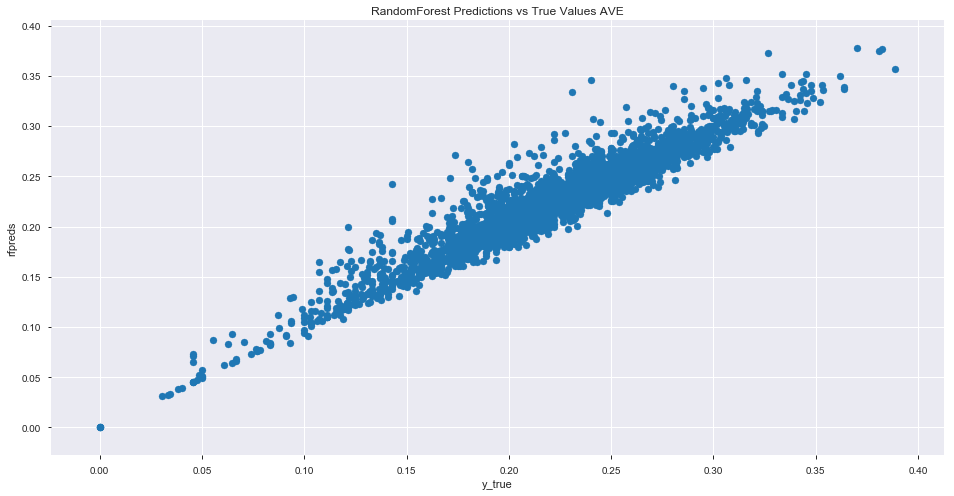

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(model_AVE_results['y_true'], model_AVE_results['rfpreds'])
plt.xlabel('y_true')
plt.ylabel('rfpreds')
plt.title('RandomForest Predictions vs True Values AVE');

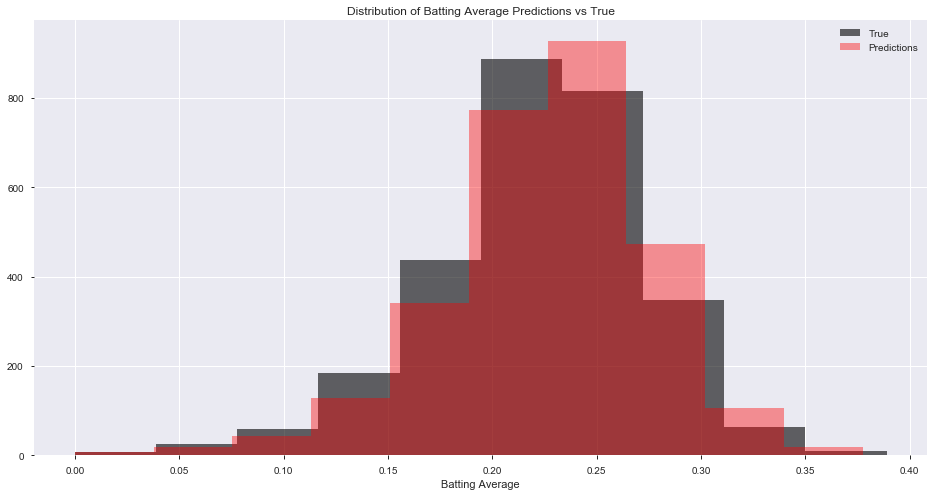

In [244]:
model_AVE_results['y_true'].hist(figsize=(16,8), label='True', alpha=0.6, color='k')
model_AVE_results['rfpreds'].hist(figsize=(16,8), label='Predictions', alpha=0.4, color='r')
plt.title('Distribution of Batting Average Predictions vs True')
plt.xlabel("Batting Average")
plt.legend();

Load Models

In [28]:
lr_RBI_model = pickle.load(open("./models/lr_RBI.pkl","rb"))

In [29]:
ridge_RBI_model = pickle.load(open("./models/ridge_RBI.pkl","rb"))

In [30]:
lasso_RBI_model = pickle.load(open("./models/lasso_RBI.pkl","rb"))

In [31]:
enet_RBI_model = pickle.load(open("./models/enet_RBI.pkl","rb"))

In [32]:
rf_RBI_model = pickle.load(open("./models/rf_RBI.pkl","rb"))

# Models to Predict RBI's

In [33]:
# RBI is the target, removed H, G, AB
attributes =['2B','3B','HR','OPS','SB','CS','BB','SO','IBB','HBP',
             'SH','SF','GIDP','pre1920_percent','1920-41_percent',
             '1942-45_percent','1946-62_percent','1963-76_percent',
             '1977-92_percent','1993-2009_percent','post2009_percent',
             'era_1','era_2','era_3','era_4','era_5','era_6','era_7',
             'era_8','decade_1910','decade_1920','decade_1930',
             'decade_1940','decade_1950','decade_1960','decade_1970',
             'decade_1980','decade_1990','decade_2000','decade_2010',
             'throws_R','bats_R','OBP','Slug_Percent','AVE','YRSPRO',
             '2B_chg','3B_chg','HR_chg','OPS_chg','SB_chg','CS_chg',
             'BB_chg','SO_chg','IBB_chg','HBP_chg','SH_chg','SF_chg',
             'GIDP_chg','OBP_chg','Slug_chg','AVE_chg','KMeans_label']

New data to test the model against

In [34]:
# unseen data
X_final = last_year_df[attributes]

Set X and y variables

In [35]:
# set X and y
X = previous_years[attributes]
y = previous_years['RBI']

In [36]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_final_poly = poly.fit_transform(X_final)

In [38]:
X_train_poly_sc = ss.fit_transform(X_train_poly)
X_test_poly_sc = ss.fit_transform(X_test_poly)
X_final_poly_sc = ss.fit_transform(X_final_poly)

Linear Regression Model to Predict RBI's

In [39]:
# R2 scores for train data
lr_train = lr_RBI_model.score(X_train, y_train)
print(lr_train)

# R2 scores for test data
lr_test = lr_RBI_model.score(X_test, y_test)
print(lr_test)

# R2 scores for new data
lr_test_new = lr_RBI_model.score(X_final, last_year_df['RBI'])
print(lr_test_new)

# make predictions
lrpreds = lr_RBI_model.predict(X_final)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['RBI'], lrpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
lr_score = rmse

0.9282337759628065
0.9311742490423233
0.8801086958714287
RMSE: 5.526281075333878


Ridge Model to Predict RBI's

In [40]:
# R2 scores for train data
ridge_train = ridge_RBI_model.score(X_train_poly_sc, y_train)
print(ridge_train)

# R2 scores for test data
ridge_test = ridge_RBI_model.score(X_test_poly_sc, y_test)
print(ridge_test)

# R2 scores for new data
ridge_test_new = ridge_RBI_model.score(X_final_poly_sc, last_year_df['RBI'])
print(ridge_test_new)

# make predictions
ridgepreds = ridge_RBI_model.predict(X_final_poly_sc)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['RBI'], ridgepreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
ridge_score = rmse

0.9493429034345244
0.9430190274928
-1.6925325162640654
RMSE: 26.189041645368615


Lasso Model to Predict RBI's

In [41]:
# R2 scores for train data
lasso_train = lasso_RBI_model.score(X_train_poly_sc, y_train)
print(lasso_train)

# R2 scores for test data
lasso_test = lasso_RBI_model.score(X_test_poly_sc, y_test)
print(lasso_test)

# R2 scores for new data
lasso_test_new = lasso_RBI_model.score(X_final_poly_sc, last_year_df['RBI'])
print(lasso_test_new)

# make predictions
lassopreds = lasso_RBI_model.predict(X_final_poly_sc)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['RBI'], lassopreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
lasso_score = rmse

0.94951401869399
0.9465989701115267
-1.5288518836501495
RMSE: 25.380538043708153


ElasticNet Model to Predict RBI's

In [42]:
# R2 scores for train data
enet_train = enet_RBI_model.score(X_train_poly_sc, y_train)
print(enet_train)

# R2 scores for test data
enet_test = enet_RBI_model.score(X_test_poly_sc, y_test)
print(enet_test)

# R2 scores for new data
enet_test_new = enet_RBI_model.score(X_final_poly_sc, last_year_df['RBI'])
print(enet_test_new)

# make predictions
enetpreds = enet_RBI_model.predict(X_final_poly_sc)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['RBI'], enetpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
enet_score = rmse


0.9218334693805789
0.9250505846389491
-1.3122351284302
RMSE: 24.269181261146084


Random Forest Model to Predict RBI's

In [43]:
# R2 scores for train data
rf_train = rf_RBI_model.score(X_train_poly, y_train)
print(rf_train)

# R2 scores for test data
rf_test = rf_RBI_model.score(X_test_poly, y_test)
print(rf_test)

# R2 scores for new data
rf_test_new = rf_RBI_model.score(X_final_poly, last_year_df['RBI'])
print(rf_test_new)

# make predictions
rfpreds = rf_RBI_model.predict(X_final_poly)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['RBI'], rfpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
rf_score = rmse


0.9887318112663641
0.9362520045126567
0.8932937127367198
RMSE: 5.213557078014037


In [44]:
rmse_scores(lr_score, ridge_score, lasso_score, enet_score,
            lr_train, lr_test, ridge_train, ridge_test, 
            lasso_train, lasso_test, enet_train, enet_test, rf_score, 
            rf_train, rf_test, lr_test_new, ridge_test_new, 
            lasso_test_new, enet_test_new, rf_test_new)

Linear Regression Train R2 Score: 0.9282337759628065
Linear Regression Test R2 Score: 0.9311742490423233
Ridge Train R2 Score: 0.9493429034345244
Ridge Test R2 Score: 0.9430190274928
Lasso Train R2 Score: 0.94951401869399
Lasso Test R2 Score: 0.9465989701115267
ElasticNet Train R2 Score: 0.9218334693805789
ElasticNet Test R2 Score: 0.9250505846389491
Random Forest Train R2 Score: 0.9887318112663641
Random Forest Test R2 Score: 0.9362520045126567
Linear Regression RMSE on New Data: 5.526281075333878
Ridge RMSE on New Data: 26.189041645368615
Lasso RMSE on New Data: 25.380538043708153
ElasticNet RMSE on New Data: 24.269181261146084
Random Forest RMSE on New Data: 5.213557078014037
Linear Regression R2 Score on New Data: 0.8801086958714287
Ridge R2 Score on New Data: -1.6925325162640654
Lasso R2 Score on New Data: -1.5288518836501495
ElasticNet R2 Score on New Data: -1.3122351284302
Random Forest R2 Score on New Data: 0.8932937127367198


# Results

In [45]:
model_RBI_results = pd.read_csv('./results_csv/model_RBI_results_FINAL.csv').drop(columns='Unnamed: 0')
model_RBI_results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds,rfpreds,playerID,nameFirst,nameLast
0,35.0,35.285378,91.212974,80.240113,68.688147,32.51,aaronha01,Hank,Aaron
1,3.0,7.190160,11.067759,11.764251,15.215989,3.50,aaronto01,Tommie,Aaron
2,10.0,17.934844,28.057116,31.391177,27.582670,16.31,abbated01,Ed,Abbaticchio
3,16.0,20.730398,41.621460,42.566313,42.418071,18.99,abnersh01,Shawn,Abner
4,14.0,15.354284,29.316073,31.163966,34.306885,14.84,abreubo01,Bobby,Abreu
5,4.0,-0.637242,10.120399,10.274957,10.505317,2.86,ackledu01,Dustin,Ackley
6,17.0,18.497687,30.590695,33.505044,31.582339,15.16,adamsbe01,Bert,Adams
7,15.0,20.127881,40.822520,42.177979,42.726437,21.13,adamsbu01,Buster,Adams
8,11.0,11.857926,26.609484,26.376545,27.361086,9.16,adamsgl01,Glenn,Adams
9,14.0,26.628733,48.320667,48.670961,45.583823,24.02,adamssp01,Sparky,Adams


In [46]:
model_RBI_results.tail(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds,rfpreds,playerID,nameFirst,nameLast
2817,5.0,1.655125,11.620334,12.787921,13.534665,4.88,youngmi01,Mike,Young
2818,4.0,10.947703,15.922061,17.677073,22.211943,5.25,youngmi02,Michael,Young
2819,42.0,57.535706,85.349515,101.012340,104.201172,52.74,youngmi02,Michael,Young
2820,4.0,7.492227,10.974427,12.239513,14.083976,3.80,youngpe01,Pep,Young
2821,35.0,35.442614,54.134074,56.603070,60.504574,34.54,youngra01,Ralph,Young
2822,43.0,40.295564,77.262744,77.386881,73.831944,38.54,youngro01,Ross,Youngs
2823,51.0,56.470074,110.947500,111.875883,121.065190,58.00,yountro01,Robin,Yount
2824,8.0,6.794537,22.465534,20.965614,24.606359,10.20,yvarssa01,Sal,Yvars
2825,2.0,3.028242,10.453744,12.263596,12.871229,3.63,zambrca01,Carlos,Zambrano
2826,4.0,3.447172,15.092001,15.350419,16.709800,6.41,zarilal01,Al,Zarilla


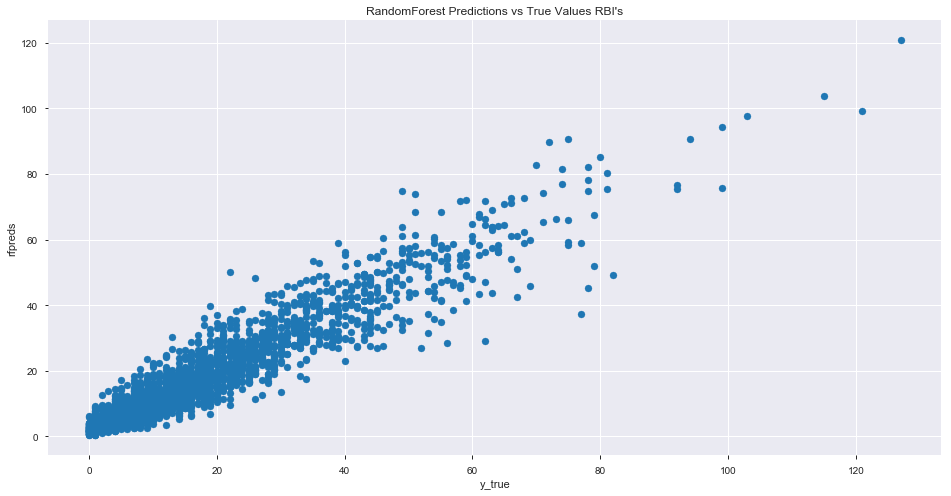

In [47]:
plt.figure(figsize=(16,8))
plt.scatter(model_RBI_results['y_true'], model_RBI_results['rfpreds'])
plt.xlabel('y_true')
plt.ylabel('rfpreds')
plt.title("RandomForest Predictions vs True Values RBI's");

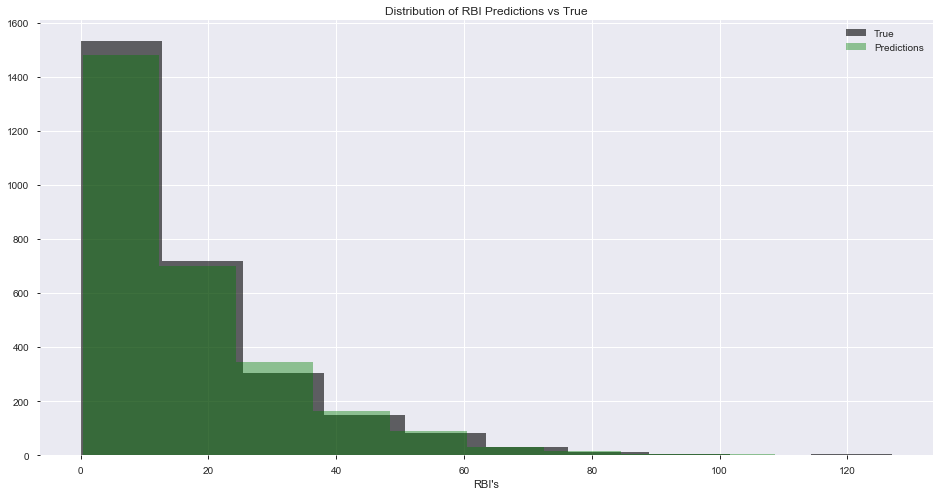

In [243]:
model_RBI_results['y_true'].hist(figsize=(16,8), label='True', alpha=0.6, color='k')
model_RBI_results['rfpreds'].hist(figsize=(16,8), label='Predictions', alpha=0.4, color='g')
plt.title('Distribution of RBI Predictions vs True')
plt.xlabel("RBI's")
plt.legend();

Load Models

In [48]:
lr_HR_model = pickle.load(open("./models/lr_HR.pkl","rb"))

In [49]:
ridge_HR_model = pickle.load(open("./models/ridge_HR.pkl","rb"))

In [50]:
lasso_HR_model = pickle.load(open("./models/lasso_HR.pkl","rb"))

In [51]:
enet_HR_model = pickle.load(open("./models/enet_HR.pkl","rb"))

In [52]:
rf_HR_model = pickle.load(open("./models/rf_HR.pkl","rb"))

# Models to Predict HR's

In [53]:
# HR is the target, removed H, G, AB
attributes = ['2B','3B','OPS','RBI','SB','CS','BB','SO','IBB','HBP',
              'SH','SF','GIDP','pre1920_percent','1920-41_percent',
              '1942-45_percent','1946-62_percent','1963-76_percent',
              '1977-92_percent','1993-2009_percent','post2009_percent',
              'era_1','era_2','era_3','era_4','era_5','era_6','era_7',
              'era_8','decade_1910','decade_1920','decade_1930','decade_1940',
              'decade_1950','decade_1960','decade_1970','decade_1980',
              'decade_1990','decade_2000','decade_2010','throws_R',
              'bats_R','OBP','Slug_Percent','AVE','YRSPRO','2B_chg','3B_chg',
              'OPS_chg','RBI_chg','SB_chg','CS_chg','BB_chg','SO_chg',
              'IBB_chg','HBP_chg','SH_chg','SF_chg','GIDP_chg','OBP_chg',
              'Slug_chg','AVE_chg','KMeans_label']

New data to test the model against

In [54]:
# unseen data
X_final = last_year_df[attributes]

Set X and y variables

In [55]:
# set X and y
X = previous_years[attributes]
y = previous_years['HR']

In [56]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_final_poly = poly.fit_transform(X_final)

In [58]:
X_train_poly_sc = ss.fit_transform(X_train_poly)
X_test_poly_sc = ss.fit_transform(X_test_poly)
X_final_poly_sc = ss.fit_transform(X_final_poly)

Linear Regression Model to Predict HR's

In [59]:
# R2 scores for train data
lr_train = lr_HR_model.score(X_train, y_train)
print(lr_train)

# R2 scores for test data
lr_test = lr_HR_model.score(X_test, y_test)
print(lr_test)

# R2 scores for new data
lr_test_new = lr_HR_model.score(X_final, last_year_df['HR'])
print(lr_test_new)

# make predictions
lrpreds = lr_HR_model.predict(X_final)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['HR'], lrpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
lr_score = rmse

0.9123830309085669
0.911395154652938
0.6736586218690606
RMSE: 2.1945386661296733


Ridge Model to Predict HR's

In [60]:
# R2 scores for train data
ridge_train = ridge_HR_model.score(X_train_poly_sc, y_train)
print(ridge_train)

# R2 scores for test data
ridge_test = ridge_HR_model.score(X_test_poly_sc, y_test)
print(ridge_test)

# R2 scores for new data
ridge_test_new = ridge_HR_model.score(X_final_poly_sc, last_year_df['HR'])
print(ridge_test_new)

# make predictions
ridgepreds = ridge_HR_model.predict(X_final_poly_sc)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['HR'], ridgepreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
ridge_score = rmse

0.9839560929298725
0.9810375920991171
-2.199257455812315
RMSE: 6.871186887441323


Lasso Model to Predict HR's

In [61]:
# R2 scores for train data
lasso_train = lasso_HR_model.score(X_train_poly_sc, y_train)
print(lasso_train)

# R2 scores for test data
lasso_test = lasso_HR_model.score(X_test_poly_sc, y_test)
print(lasso_test)

# R2 scores for new data
lasso_test_new = lasso_HR_model.score(X_final_poly_sc, last_year_df['HR'])
print(lasso_test_new)

# make predictions
lassopreds = lasso_HR_model.predict(X_final_poly_sc)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['HR'], lassopreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
lasso_score = rmse

0.9895424128271637
0.9873949398289043
-2.024247067469625
RMSE: 6.6806050835395405


ElasticNet Model to Predict HR's

In [62]:
# R2 scores for train data
enet_train = enet_HR_model.score(X_train_poly_sc, y_train)
print(enet_train)

# R2 scores for test data
enet_test = enet_HR_model.score(X_test_poly_sc, y_test)
print(enet_test)

# R2 scores for new data
enet_test_new = enet_HR_model.score(X_final_poly_sc, last_year_df['HR'])
print(enet_test_new)

# make predictions
enetpreds = enet_HR_model.predict(X_final_poly_sc)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['HR'], enetpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
enet_score = rmse

0.8732944355681218
0.873122027197329
-1.221076649274769
RMSE: 5.7251772746060565


Random Forest Model to Predict HR's

In [63]:
# R2 scores for train data
rf_train = rf_HR_model.score(X_train_poly, y_train)
print(rf_train)

# R2 scores for test data
rf_test = rf_HR_model.score(X_test_poly, y_test)
print(rf_test)

# R2 scores for new data
rf_test_new = rf_HR_model.score(X_final_poly, last_year_df['HR'])
print(rf_test_new)

# make predictions
rfpreds = rf_HR_model.predict(X_final_poly)

# find the root mean squared error on new data
mse = mean_squared_error(last_year_df['HR'], rfpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
rf_score = rmse


0.9914084916509395
0.9565788564133643
0.932269482244308
RMSE: 0.9997683023791144


In [64]:
rmse_scores(lr_score, ridge_score, lasso_score, enet_score,
            lr_train, lr_test, ridge_train, ridge_test, 
            lasso_train, lasso_test, enet_train, enet_test, rf_score, 
            rf_train, rf_test, lr_test_new, ridge_test_new, 
            lasso_test_new, enet_test_new, rf_test_new)

Linear Regression Train R2 Score: 0.9123830309085669
Linear Regression Test R2 Score: 0.911395154652938
Ridge Train R2 Score: 0.9839560929298725
Ridge Test R2 Score: 0.9810375920991171
Lasso Train R2 Score: 0.9895424128271637
Lasso Test R2 Score: 0.9873949398289043
ElasticNet Train R2 Score: 0.8732944355681218
ElasticNet Test R2 Score: 0.873122027197329
Random Forest Train R2 Score: 0.9914084916509395
Random Forest Test R2 Score: 0.9565788564133643
Linear Regression RMSE on New Data: 2.1945386661296733
Ridge RMSE on New Data: 6.871186887441323
Lasso RMSE on New Data: 6.6806050835395405
ElasticNet RMSE on New Data: 5.7251772746060565
Random Forest RMSE on New Data: 0.9997683023791144
Linear Regression R2 Score on New Data: 0.6736586218690606
Ridge R2 Score on New Data: -2.199257455812315
Lasso R2 Score on New Data: -2.024247067469625
ElasticNet R2 Score on New Data: -1.221076649274769
Random Forest R2 Score on New Data: 0.932269482244308


# Results

In [65]:
model_HR_results = pd.read_csv('./results_csv/model_HR_results_FINAL.csv').drop(columns='Unnamed: 0')
model_HR_results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds,rfpreds,playerID,nameFirst,nameLast
0,10,9.759977,26.749041,23.732485,14.312723,8.61,aaronha01,Hank,Aaron
1,0,-2.299499,0.742150,0.777966,1.848613,0.04,aaronto01,Tommie,Aaron
2,0,-2.822582,-0.076365,1.191664,2.424248,0.29,abbated01,Ed,Abbaticchio
3,1,0.475972,5.414048,4.848497,7.968750,1.57,abnersh01,Shawn,Abner
4,1,-0.122590,2.123181,3.756454,6.472627,1.55,abreubo01,Bobby,Abreu
5,0,-3.630766,2.882759,1.576469,0.610958,0.10,ackledu01,Dustin,Ackley
6,1,0.628839,2.591487,2.407254,4.439486,0.37,adamsbe01,Bert,Adams
7,2,2.348358,4.114058,5.980206,7.493814,2.53,adamsbu01,Buster,Adams
8,1,1.397641,4.656517,4.084640,4.595881,1.69,adamsgl01,Glenn,Adams
9,0,-1.550142,3.382287,3.388611,4.424133,0.52,adamssp01,Sparky,Adams


In [66]:
model_HR_results.tail(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds,rfpreds,playerID,nameFirst,nameLast
2817,1,-0.906386,3.632268,2.645335,2.072186,0.46,youngmi01,Mike,Young
2818,0,-2.331376,1.598088,1.064356,3.993969,0.51,youngmi02,Michael,Young
2819,8,6.960145,21.821446,21.874841,23.879248,7.48,youngmi02,Michael,Young
2820,1,1.951104,2.337246,1.622483,1.246745,0.63,youngpe01,Pep,Young
2821,1,2.070440,6.222354,7.133128,7.227073,1.10,youngra01,Ralph,Young
2822,4,3.775641,10.932401,11.907965,10.471711,1.87,youngro01,Ross,Youngs
2823,8,10.452926,22.606110,21.476447,27.744660,10.05,yountro01,Robin,Yount
2824,2,4.428779,5.246799,4.773894,5.024023,2.27,yvarssa01,Sal,Yvars
2825,1,1.069270,2.226620,1.518178,1.462173,0.91,zambrca01,Carlos,Zambrano
2826,0,-3.197424,0.417160,-0.376872,2.107946,0.06,zarilal01,Al,Zarilla


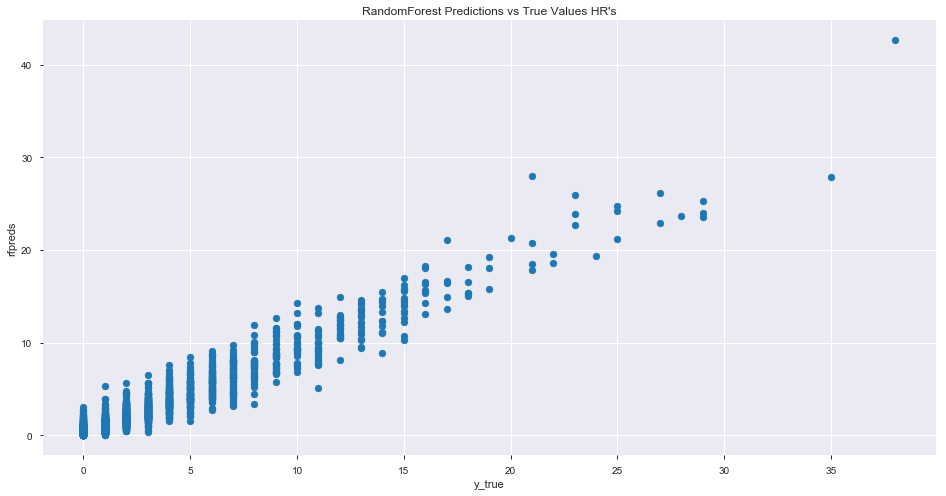

In [67]:
plt.figure(figsize=(16,8))
plt.scatter(model_HR_results['y_true'], model_HR_results['rfpreds'])
plt.xlabel('y_true')
plt.ylabel('rfpreds')
plt.title("RandomForest Predictions vs True Values HR's");

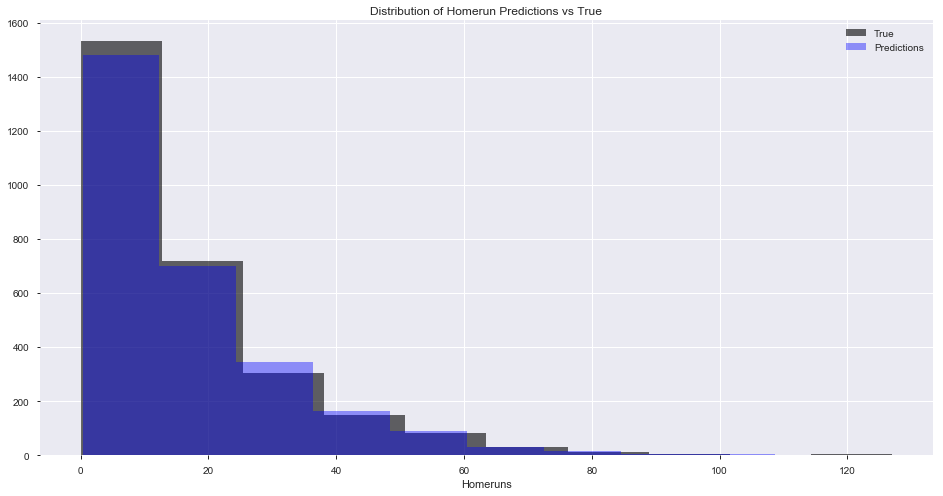

In [242]:
model_RBI_results['y_true'].hist(figsize=(16,8), label='True', alpha=0.6, color='k')
model_RBI_results['rfpreds'].hist(figsize=(16,8), label='Predictions', alpha=0.4, color='b')
plt.title('Distribution of Homerun Predictions vs True')
plt.xlabel("Homeruns")
plt.legend();

# Main DataFrame

In [68]:
batter_and_change_FINAL = pd.read_csv('batter_and_change_FINAL.csv').drop(columns='Unnamed: 0')
batter_and_change_FINAL.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
0,aaronha01,1954,ML1,1,122,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,0.0,3.0,6.0,4.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.279915,0.322068,0.446581,0.768649,1954,1954,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
1,aaronha01,1955,ML1,1,153,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.313953,0.366261,0.539867,0.906129,1954,1955,1,0.286325,0.810345,0.442748,0.370370,0.500000,1.076923,0.536232,0.500000,-0.500000,0.750000,0.564103,0.000000,0.000000,0.166667,0.000000,0.538462,0.121605,0.137219,0.208889,0.178859,4
2,aaronha01,1956,ML1,1,153,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.328407,0.364885,0.558292,0.923178,1954,1956,2,0.011628,0.009524,0.058201,-0.081081,0.555556,-0.037037,-0.132075,-0.333333,3.000000,-0.244898,-0.114754,0.200000,-0.333333,-0.285714,0.750000,0.050000,0.046038,-0.003757,0.034129,0.018816,4
3,aaronha01,1957,ML1,1,151,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.321951,0.377778,0.600000,0.977778,1954,1957,3,0.009852,0.113208,-0.010000,-0.205882,-0.571429,0.692308,0.434783,-0.500000,-0.750000,0.540541,0.074074,1.500000,-1.000000,-1.000000,-0.571429,-0.380952,-0.019659,0.035332,0.074706,0.059144,4
4,aaronha01,1958,ML1,1,153,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.326123,0.385542,0.545757,0.931299,1954,1958,4,-0.022764,-0.076271,-0.010101,0.259259,-0.333333,-0.318182,-0.280303,3.000000,0.000000,0.035088,-0.155172,0.066667,0.000000,0.000000,0.000000,0.615385,0.012958,0.020553,-0.090405,-0.047535,4
5,aaronha01,1959,ML1,1,154,629,116,223,46,7,39,123.0,8.0,0.0,51,54.0,17.0,4.0,0.0,9.0,19.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0.354531,0.401154,0.635930,1.037084,1954,1959,5,0.046589,0.064220,0.137755,0.352941,0.750000,0.300000,0.294737,1.000000,-1.000000,-0.135593,0.102041,0.062500,3.000000,0.000000,2.000000,-0.095238,0.087108,0.040494,0.165225,0.113589,4
6,aaronha01,1960,ML1,1,153,590,102,172,20,11,40,126.0,16.0,7.0,60,63.0,13.0,2.0,0.0,12.0,8.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.291525,0.352410,0.566102,0.918511,1954,1960,6,-0.062003,-0.120690,-0.228700,-0.565217,0.571429,0.025641,0.024390,1.000000,0.000000,0.176471,0.166667,-0.235294,-0.500000,0.000000,0.333333,-0.578947,-0.177715,-0.121511,-0.109805,-0.114333,6
7,aaronha01,1961,ML1,1,155,603,115,197,39,10,34,120.0,21.0,9.0,56,64.0,20.0,2.0,1.0,9.0,16.0,Hank,Aaron,R,R,1954-04-13,1976,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.326700,0.380597,0.593698,0.

In [69]:
batter_and_change_FINAL.tail(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,finalGame,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,era_1,era_2,era_3,era_4,era_5,era_6,era_7,era_8,decade_1910,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
41725,zobribe01,2015,OAK,1,67,235,39,63,20,2,6,33.0,1.0,1.0,33,26.0,2.0,0.0,0.0,3.0,5.0,Ben,Zobrist,B,R,2006-08-01,2019,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.185162,0.814838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.268085,0.354244,0.446809,0.801052,2006,2015,9,0.012931,0.054054,-0.045455,0.250000,1.0,-0.142857,0.434783,-0.500000,-0.666667,0.137931,-0.133333,1.000000,-1.000000,0.000000,0.500000,0.666667,-0.057640,-0.025830,-0.012766,-0.018586,3
41726,zobribe01,2016,CHN,1,147,523,94,142,31,3,18,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0,Ben,Zobrist,B,R,2006-08-01,2019,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.185162,0.814838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.271511,0.385965,0.445507,0.831472,2006,2016,10,1.225532,1.410256,1.253968,0.550000,0.5,2.000000,1.303030,5.000000,3.000000,1.909091,2.153846,2.000000,0.000000,0.000000,0.333333,2.400000,0.012777,0.089547,-0.002914,0.037975,3
41727,zobribe01,2017,CHN,1,128,435,58,101,20,3,12,50.0,2.0,2.0,54,71.0,2.0,2.0,2.0,3.0,13.0,Ben,Zobrist,B,R,2006-08-01,2019,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.185162,0.814838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.232184,0.317814,0.374713,0.692526,2006,2017,11,-0.168260,-0.382979,-0.288732,-0.354839,0.0,-0.333333,-0.342105,-0.666667,-0.500000,-0.437500,-0.134146,-0.666667,-0.500000,-0.500000,-0.250000,-0.235294,-0.144844,-0.176573,-0.158907,-0.167108,3
41728,zobribe01,2018,CHN,1,139,455,67,139,28,3,9,58.0,3.0,4.0,55,60.0,1.0,2.0,1.0,7.0,8.0,Ben,Zobrist,B,R,2006-08-01,2019,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.185162,0.814838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.305495,0.377649,0.439560,0.817210,2006,2018,12,0.045977,0.155172,0.376238,0.400000,0.0,-0.250000,0.160000,0.500000,1.000000,0.018519,-0.154930,-0.500000,0.000000,-0.500000,1.333333,-0.384615,0.315744,0.188272,0.173060,0.180041,3
41729,zoldasa01,1945,SLA,1,27,20,0,1,0,0,0,1.0,0.0,0.0,0,8.0,0.0,0.0,0.0,0.0,0.0,Sam,Zoldak,L,L,1944-05-13,1952,0.0,0.000000,0.184932,0.815068,0.0,0.0,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.050000,0.050000,0.050000,0.100000,1944,1945,1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
41730,zoldasa01,1946,SLA,1,35,52,3,9,1,0,0,0.0,0.0,0.0,3,12.0,0.0,0.0,3.0,0.0,0.0,Sam,Zoldak,L,L,1944-05-13,1952,0.0,0.000000,0.184932,0.815068,0.0,0.0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.173077,0.218182,0.192308,0.410490,1944,1946,2,1.600000,0.000000,8.000000,0.000000,0.0,0.000000,-1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2.461538,3.363636,2.846154,3.104895,4
41731,zoldasa01,1947,SLA,1,35,58,4,10,2,0,0,3.0,0.0,0.0,3,10.0,0.0,0.0,1.0,0.0,0.0,Sam,Zoldak,L,L,1944-05-13,1952,0.0,0.000000,0.184932,0.815068,0.0,0.0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.172414,0.213115,0.206897,0.420011,1944,1947,3,0.115385,0.333333,0.111111,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.166667,0.000000,0.000000,-0.666667,0.000000,0.000000,-0.003831,-0.023224,0.075862,0.023196,4
41732,zoldasa01,1948,CLE,2,23,36,0,5,1,0,0,0.0,0.0,0.0,1,6.0,0.0,0.0,2.0,0.0,2.0,Sam,Zoldak,L,L,1944-05-13,1952,0.0,0.000000,0.184932,0.815068,0.0,0.0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0

DataFrame Shapes

In [70]:
previous_years.shape

(38908, 84)

In [71]:
last_year_df.shape

(2837, 84)

In [72]:
batter_and_change_FINAL.shape

(41745, 84)

In [73]:
batter_and_change_FINAL.columns

Index(['playerID', 'yearID', 'teamID', 'stint', 'G', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF',
       'GIDP', 'nameFirst', 'nameLast', 'bats', 'throws', 'debut', 'finalGame',
       'pre1920_percent', '1920-41_percent', '1942-45_percent',
       '1946-62_percent', '1963-76_percent', '1977-92_percent',
       '1993-2009_percent', 'post2009_percent', 'era_1', 'era_2', 'era_3',
       'era_4', 'era_5', 'era_6', 'era_7', 'era_8', 'decade_1910',
       'decade_1920', 'decade_1930', 'decade_1940', 'decade_1950',
       'decade_1960', 'decade_1970', 'decade_1980', 'decade_1990',
       'decade_2000', 'decade_2010', 'throws_R', 'bats_R', 'AVE', 'OBP',
       'Slug_Percent', 'OPS', 'debutYear', 'currentYear', 'YRSPRO', 'AB_chg',
       'R_chg', 'H_chg', '2B_chg', '3B_chg', 'HR_chg', 'RBI_chg', 'SB_chg',
       'CS_chg', 'BB_chg', 'SO_chg', 'IBB_chg', 'HBP_chg', 'SH_chg', 'SF_chg',
       'GIDP_chg', 'AVE_chg', 'OBP_chg', 'Slug_chg', 'OPS_c

# Target Distributions

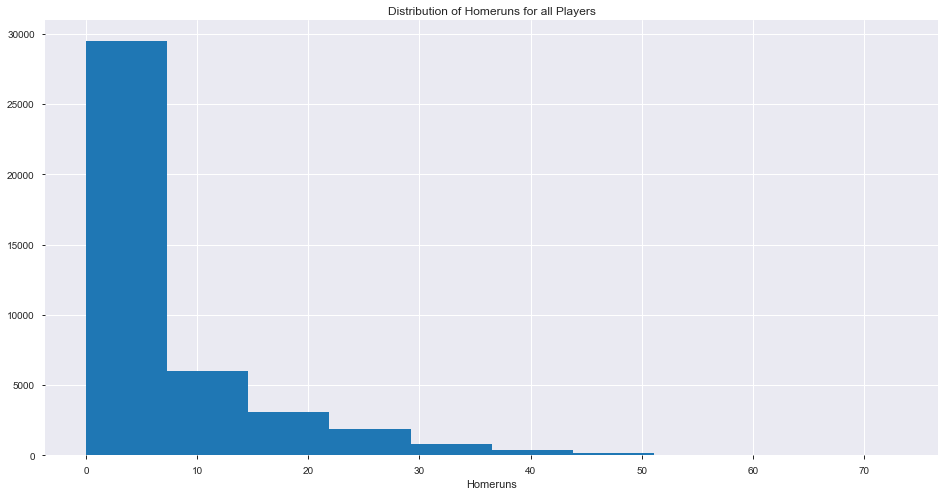

In [194]:
batter_and_change_FINAL['HR'].hist(figsize=(16,8))
plt.title('Distribution of Homeruns for all Players')
plt.xlabel('Homeruns');

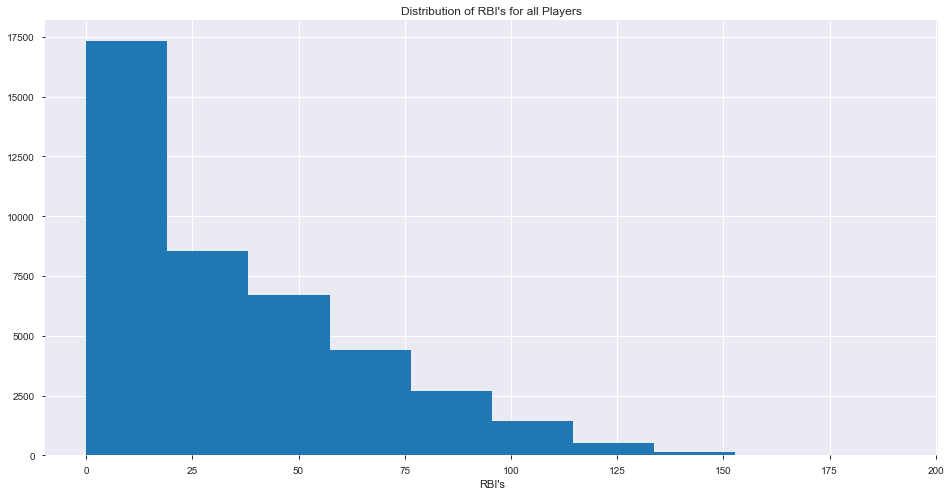

In [197]:
batter_and_change_FINAL['RBI'].hist(figsize=(16,8))
plt.title("Distribution of RBI's for all Players")
plt.xlabel("RBI's");

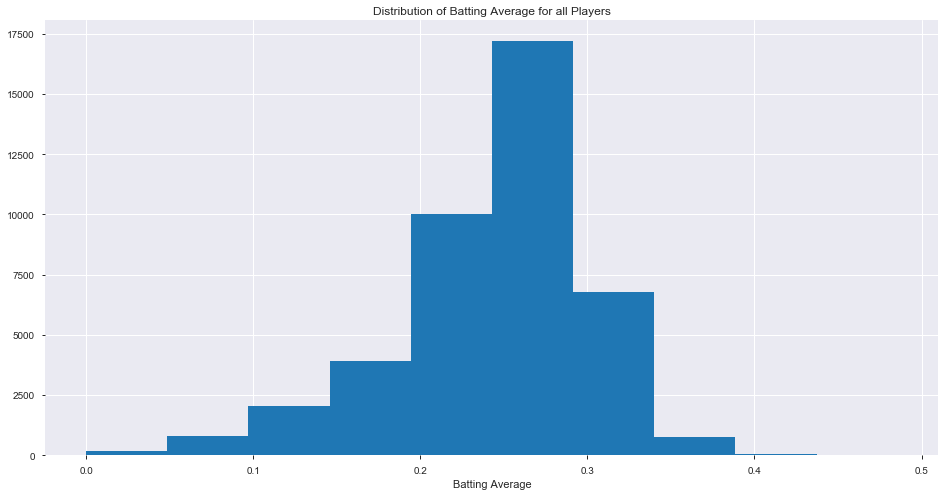

In [198]:
batter_and_change_FINAL['AVE'].hist(figsize=(16,8))
plt.title('Distribution of Batting Average for all Players')
plt.xlabel('Batting Average');

In [94]:
# examine list of columns of the train data 
X_train.columns.values

array(['2B', '3B', 'OPS', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'pre1920_percent', '1920-41_percent',
       '1942-45_percent', '1946-62_percent', '1963-76_percent',
       '1977-92_percent', '1993-2009_percent', 'post2009_percent',
       'era_1', 'era_2', 'era_3', 'era_4', 'era_5', 'era_6', 'era_7',
       'era_8', 'decade_1910', 'decade_1920', 'decade_1930',
       'decade_1940', 'decade_1950', 'decade_1960', 'decade_1970',
       'decade_1980', 'decade_1990', 'decade_2000', 'decade_2010',
       'throws_R', 'bats_R', 'OBP', 'Slug_Percent', 'AVE', 'YRSPRO',
       '2B_chg', '3B_chg', 'OPS_chg', 'RBI_chg', 'SB_chg', 'CS_chg',
       'BB_chg', 'SO_chg', 'IBB_chg', 'HBP_chg', 'SH_chg', 'SF_chg',
       'GIDP_chg', 'OBP_chg', 'Slug_chg', 'AVE_chg', 'KMeans_label'],
      dtype=object)

# Most Important Features of Models

Random Forest AVE

In [160]:
# get feature importances of randomforest model
rf_AVE_model.feature_importances_

array([8.52479137e-05, 3.08028564e-05, 4.31337900e-04, ...,
       6.03127598e-05, 3.83301084e-05, 9.41941991e-06])

In [161]:
# examine number of features
rf_AVE_model.n_features_

2079

In [162]:
# retrieve feature names from polynomial features transformer
rf_AVE_features = poly.get_feature_names(X_train.columns)

In [163]:
# zip feature names with feature importance, then convert to dictionary
rf_AVE_feature_list = list(zip(rf_AVE_features, rf_AVE_model.feature_importances_))
rf_AVE_feature_dict = dict(rf_AVE_feature_list)

In [164]:
# create dataframe from feature names and importance
rf_AVE_feature_df = pd.DataFrame.from_dict(rf_AVE_feature_dict, orient='index').reset_index()
rf_AVE_feature_df.head()

,index,0
0,2B,0.000085
1,3B,0.000031
2,OPS,0.000431
3,RBI,0.000099
4,SB,0.000018


In [165]:
# change column names
rf_AVE_feature_df.rename(columns={'index':'features', 0:'importance'}, inplace=True)
rf_AVE_feature_df.head()

,features,importance
0,2B,0.000085
1,3B,0.000031
2,OPS,0.000431
3,RBI,0.000099
4,SB,0.000018


In [166]:
# sort values to determine the most important features
rf_AVE_feature_df.sort_values(by='importance', ascending=False).head(20)

,features,importance
1849,OBP Slug_Percent,0.672240
228,OPS OBP,0.180931
229,OPS Slug_Percent,0.015534
463,BB Slug_Percent,0.012084
464,BB AVE,0.010909
427,BB SO,0.007599
105,2B OBP,0.004799
192,OPS BB,0.003709
66,2B RBI,0.003132
432,BB GIDP,0.002926


Random Forest RBI

In [173]:
# get feature importances of randomforest model
rf_RBI_model.feature_importances_

array([6.47542579e-05, 1.60798676e-05, 2.00411032e-04, ...,
       1.72878995e-04, 6.61776871e-05, 4.64721446e-06])

In [174]:
# examine number of features
rf_RBI_model.n_features_

2079

In [175]:
# retrieve feature names from polynomial features transformer
rf_RBI_features = poly.get_feature_names(X_train.columns)

In [176]:
# zip feature names with feature importance, then convert to dictionary
rf_RBI_feature_list = list(zip(rf_RBI_features, rf_RBI_model.feature_importances_))
rf_RBI_feature_dict = dict(rf_RBI_feature_list)

In [177]:
# create dataframe from feature names and importance
rf_RBI_feature_df = pd.DataFrame.from_dict(rf_RBI_feature_dict, orient='index').reset_index()
rf_RBI_feature_df.head()

,index,0
0,2B,0.000065
1,3B,0.000016
2,OPS,0.000200
3,RBI,0.000069
4,SB,0.000019


In [178]:
# change column names
rf_RBI_feature_df.rename(columns={'index':'features', 0:'importance'}, inplace=True)
rf_RBI_feature_df.head()

,features,importance
0,2B,0.000065
1,3B,0.000016
2,OPS,0.000200
3,RBI,0.000069
4,SB,0.000019


In [179]:
# sort values to determine the most important features
rf_RBI_feature_df.sort_values(by='importance', ascending=False).head(20)

,features,importance
106,2B Slug_Percent,0.600547
65,2B OPS,0.165273
69,2B BB,0.080705
230,OPS AVE,0.029625
64,2B 3B,0.012446
127,3B OPS,0.003488
702,SF GIDP,0.003295
197,OPS SF,0.003104
139,3B 1920-41_percent,0.002910
107,2B AVE,0.002892


Random Forest HR

In [180]:
# get feature importances of randomforest model
rf_HR_model.feature_importances_

array([7.30495141e-05, 3.28310175e-05, 7.91912575e-05, ...,
       8.50106163e-05, 5.56744125e-05, 5.08594381e-06])

In [181]:
# examine number of features
rf_HR_model.n_features_

2079

In [182]:
# retrieve feature names from polynomial features transformer
rf_HR_features = poly.get_feature_names(X_train.columns)

In [183]:
# zip feature names with feature importance, then convert to dictionary
rf_HR_feature_list = list(zip(rf_HR_features, rf_HR_model.feature_importances_))
rf_HR_feature_dict = dict(rf_HR_feature_list)

In [184]:
# create dataframe from feature names and importance
rf_HR_feature_df = pd.DataFrame.from_dict(rf_HR_feature_dict, orient='index').reset_index()
rf_HR_feature_df.head()

,index,0
0,2B,0.000073
1,3B,0.000033
2,OPS,0.000079
3,RBI,0.000194
4,SB,0.000013


In [185]:
# change column names
rf_HR_feature_df.rename(columns={'index':'features', 0:'importance'}, inplace=True)
rf_HR_feature_df.head()

,features,importance
0,2B,0.000073
1,3B,0.000033
2,OPS,0.000079
3,RBI,0.000194
4,SB,0.000013


In [186]:
# sort values to determine the most important features
rf_HR_feature_df.sort_values(by='importance', ascending=False).head(20)

,features,importance
253,RBI SO,0.593223
289,RBI Slug_Percent,0.155370
43,Slug_Percent,0.065035
1869,Slug_Percent^2,0.062440
519,SO Slug_Percent,0.017111
1889,AVE^2,0.011973
44,AVE,0.011102
488,SO GIDP,0.009086
169,3B AVE,0.003270
64,2B 3B,0.002999
